<a href="https://colab.research.google.com/github/ramya1807/Hospital-Playlist/blob/main/Preliminary%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required packages

In [ ]:
import pandas as pd
import seaborn as sns


# Load Dataset
  * GitHub Clone
  * Read CSV file, saved as master

In [ ]:
!git clone https://github.com/SunnyShikhar/music-datamining.git
!ls music-datamining/data

Cloning into 'music-datamining'...
remote: Enumerating objects: 1228, done.
remote: Total 1228 (delta 0), reused 0 (delta 0), pack-reused 1228
Receiving objects: 100% (1228/1228), 8.41 MiB | 21.43 MiB/s, done.
Resolving deltas: 100% (376/376), done.
master.csv  song_metrics.csv  songs_only.csv  survey.csv


In [ ]:
master = pd.read_csv('music-datamining/data/master.csv')
master

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,song2,song3,trauma,id,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,Trust Nobody Selena Gomez Tory Lanez Cashmere Cat,Don't Wanna Know Maroon5 Kendrick Lamar,No,0,21,0.633000,0.655000,0.110000,0.571500,98.368000,0.000025,0.281600,71.500000,1.0
1,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,High rhe beach lana del rey,New level asap ferg,No,1,25,0.655000,0.526000,0.116000,0.156000,121.127000,0.000000,0.056600,65.000000,1.0
2,05/11/2016 14:45:41,Female,18 - 30,0 - 1,5,5,4,4,5,Fireproof Coleman Hell,Love on the Brain Rhianna,This Girl Kungs vs Cookin' on 3 Burners,No,2,23,0.745500,0.742000,0.183500,0.618500,125.009000,0.000023,0.053800,63.500000,1.0
3,05/11/2016 14:45:55,Male,18 - 30,2+,3,6,5,5,5,Eyes Nose Lips TaeYang,Me Like Yuh Jay Park,Aquaman Jay Park,No,3,24,0.739000,0.681667,0.148900,0.596000,113.576000,0.000001,0.348867,60.333333,1.0
4,05/11/2016 14:49:15,Female,18 - 30,0 - 1,2,5,2,1,5,Sugar Wanderlust,Blue Jeans Lana Del Ray,Mr. Bright side the killers,Yes,4,15,0.539000,0.513000,0.215500,0.291500,122.460500,0.464350,0.599500,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,08/11/2016 11:48:52,Female,18 - 30,0 - 1,5,5,3,5,5,When I see you again Charlie Puth,GOLD Kiiara,I was here Beyonce,No,230,23,0.519500,0.555000,0.113350,0.321000,112.020500,0.001250,0.523000,69.000000,1.0
231,08/11/2016 12:02:50,Male,18 - 30,1 - 2,2,3,4,3,3,Light up the sky the Afters,Son of man Phil Colins,If Today is your last day Nickelback,Yes,231,15,0.635500,0.520500,0.210300,0.498500,115.990000,0.016350,0.015955,27.000000,0.0
232,08/11/2016 12:38:19,Female,18 - 30,0 - 1,4,5,4,5,5,Reaper Sia,Lost On You Death Valley,Don't Ed Sheeran,Yes,232,23,0.738333,0.686000,0.283033,0.778667,99.346667,0.060037,0.017473,62.000000,1.0
233,08/11/2016 19:39:43,Female,18 - 30,2+,0,3,3,1,1,fake love drake,24K Magic Bruno Mars,daddy lessons beyonce,No,233,8,0.633000,0.800333,0.392467,0.638000,119.664333,0.000005,0.047067,75.333333,0.0


In [ ]:
data = pd.DataFrame(master)

In [ ]:
data = data.dropna()

# Explore Data Structure
  * Look at columns available and their datatypes
  * Identify more interesting columns to be explored and the visualisation type

In [ ]:
print(master.columns)

Index(['timestamp', 'gender', 'age', 'amount_music', 'life_enjoyment',
       'resilience', 'balanced_life', 'emotional_flex', 'self_actualization',
       'song1', 'song2', 'song3', 'trauma', 'id', 'total_health', 'energy',
       'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic',
       'popularity', 'health_categorical'],
      dtype='object')


In [ ]:
master.dtypes

timestamp              object
gender                 object
age                    object
amount_music           object
life_enjoyment          int64
resilience              int64
balanced_life           int64
emotional_flex          int64
self_actualization      int64
song1                  object
song2                  object
song3                  object
trauma                 object
id                      int64
total_health            int64
energy                float64
dance                 float64
liveness              float64
valence               float64
tempo                 float64
instrumental          float64
acoustic              float64
popularity            float64
health_categorical    float64
dtype: object

In [ ]:
cat_codes = ['gender', 'age', 'song1', 'song2', 'song3', 'trauma', 'amount_music']
for i in cat_codes:
  data[i] = pd.Categorical(data[i])
  data[i] = data[i].cat.codes

interviewee data
* timestamp              object
* gender                 object (Done by Suzanne)
* age                    object
* amount_music           object (0-1, 1-2, 2+, 3+, 5, 9)
* id                      int64 (assign id to each interviewee)

interview health data
* life_enjoyment          int64 (rated on likert scale)
* resilience              int64 (rated on likert scale)
* balanced_life           int64 (rated on likert scale)
* emotional_flex          int64 (rated on likert scale)
* self_actualization      int64 (rated on likert scale)
* trauma                 object (Yes/No)
* total_health            int64 (summation of likert values)
* health_categorical    float64 (0/1 depending on total_health value)

song data
* song1                  object (name of song)
* song2                  object (name of song)
* song3                  object (name of song)
* energy                float64
* dance                 float64
* liveness              float64
* valence               float64
* tempo                 float64
* instrumental          float64
* acoustic              float64
* popularity            float64


Chosen visualisations and attributes:
* trauma and total_health by number of hours spent listening to music
* trauma and total_health mapped to each song variable (energy to popularity).

# Data Visualisation: Distribution of hours spent listening to music mapped to health variables

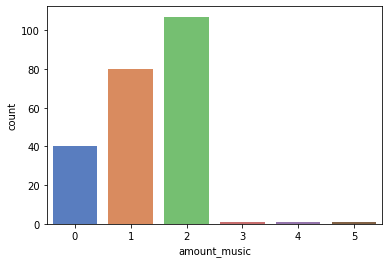

In [ ]:
sns.countplot(x="amount_music", data=data, palette="muted");
# mostly 2+ hours of music

## Trauma as categorical health variable

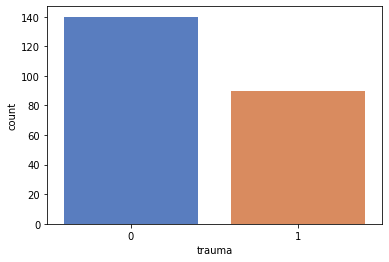

In [ ]:
sns.countplot(x="trauma", data=data, palette="muted");
# Mostly no trauma

In [ ]:
# getting values as a list
trauma = master.trauma.to_list()
amount_music = master.amount_music.to_list()

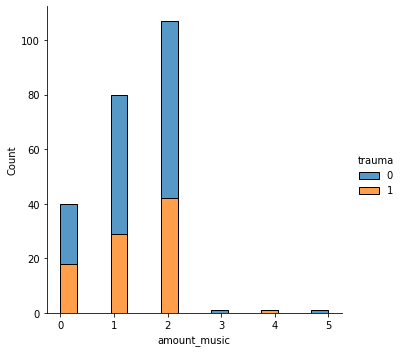

In [ ]:
sns.displot(data=data, x='amount_music', hue='trauma', multiple='stack')

## Total health as integer health variable

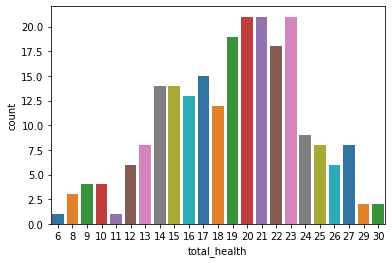

In [ ]:
sns.countplot(x="total_health", data=data, palette="tab10");
# Mostly health averaging around 20 to 24 which is roughly 4-5 for each likert scale variable

# show diversity of total_health

In [ ]:
# getting values as a list
total_health = master.total_health.to_list()

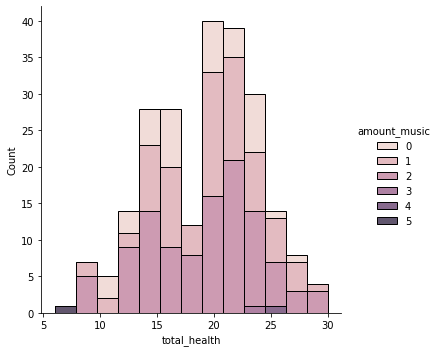

In [ ]:
sns.displot(data=data, x='total_health', hue='amount_music', multiple='stack')

In [ ]:
# Data Visualisation: Trauma mapped to mental health

# Data Visualisation: Trauma mapped to each song variable (energy to popularity).
* energy                float64
* dance                 float64
* liveness              float64
* valence               float64
* tempo                 float64
* instrumental          float64
* acoustic              float64
* popularity            float64

In [ ]:
# map all variables
energy = master.energy.to_list()
dance = master.dance.to_list()
liveness = master.liveness.to_list()
valence = master.valence.to_list()
tempo = master.tempo.to_list()
instrumental = master.instrumental.to_list()
acoustic = master.acoustic.to_list()
popularity = master.popularity.to_list()

## Energy

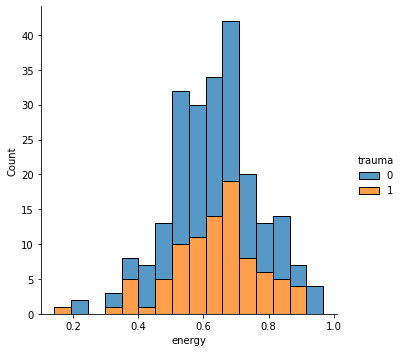

In [ ]:
sns.displot(x='energy', data=data, hue='trauma', multiple='stack') 
# energy count higher nearing 0.7

## Dance

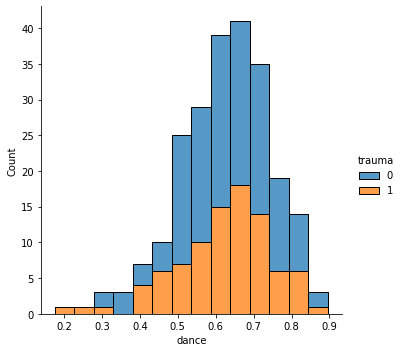

In [ ]:
sns.displot(x='dance', data=data, hue='trauma', multiple='stack') 
# dance values highest from 0.6 to 0.75

## Liveness

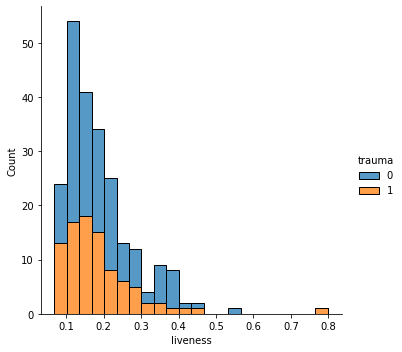

In [ ]:
sns.displot(x='liveness', data=data, hue='trauma', multiple='stack') 

## Valence

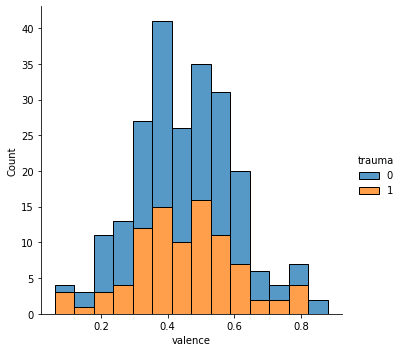

In [ ]:
sns.displot(x='valence', data=data, hue='trauma', multiple='stack') 

## Tempo

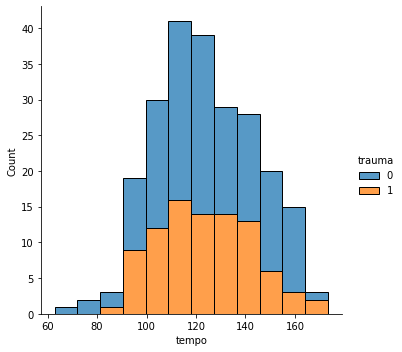

In [ ]:
sns.displot(x='tempo', data=data, hue='trauma', multiple='stack') 

## Instrumental

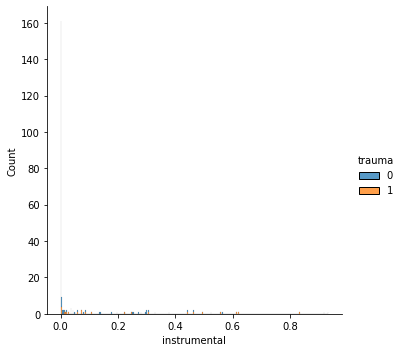

In [ ]:
sns.displot(x='instrumental', data=data, hue='trauma', multiple='stack') 
# too few data points to consider

## Acoustic

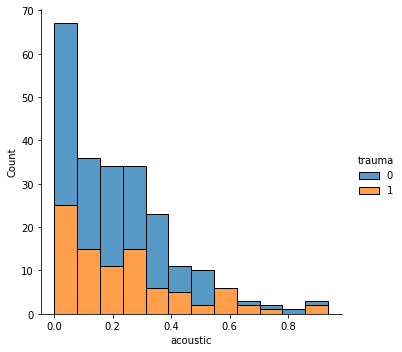

In [ ]:
sns.displot(x='acoustic', data=data, hue='trauma', multiple='stack') 

## Popularity

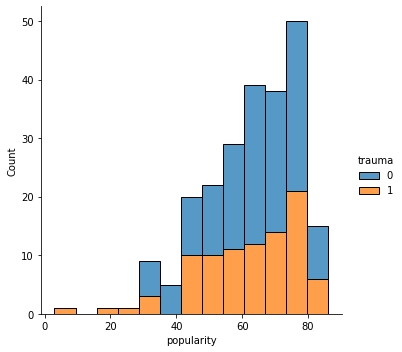

In [ ]:
sns.displot(x='popularity', data=data, hue='trauma', multiple='stack') 

# Data Visualisation: Total health mapped to each song variable (energy to popularity).
* energy                float64
* dance                 float64
* liveness              float64
* valence               float64
* tempo                 float64
* instrumental          float64
* acoustic              float64
* popularity            float64

## Energy

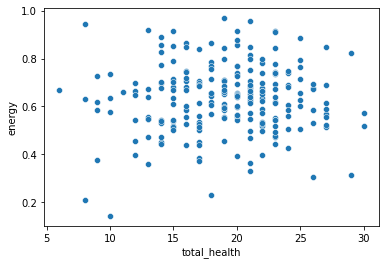

In [ ]:
sns.scatterplot(x='total_health', data=data, y='energy') 

## Dance

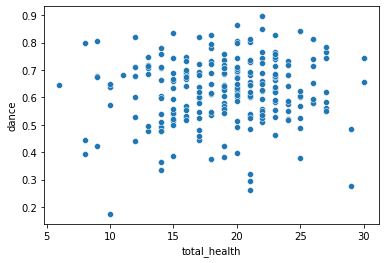

In [ ]:
sns.scatterplot(x='total_health', data=data, y='dance') 

## Liveness

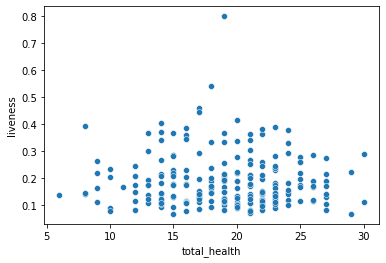

In [ ]:
sns.scatterplot(x='total_health', data=data, y='liveness') 

## Valence

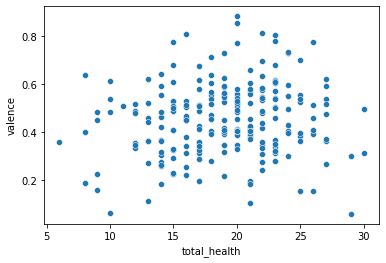

In [ ]:
sns.scatterplot(x='total_health', data=data, y='valence') 

## Tempo

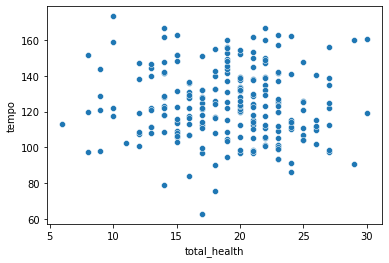

In [ ]:
sns.scatterplot(x='total_health', data=data, y='tempo') 

## Instrumental

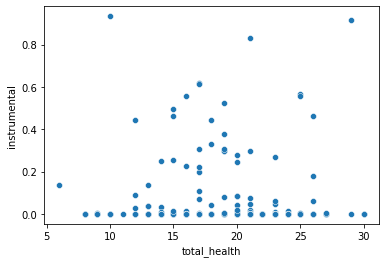

In [ ]:
sns.scatterplot(x='total_health', data=data, y='instrumental') 

## Acoustic

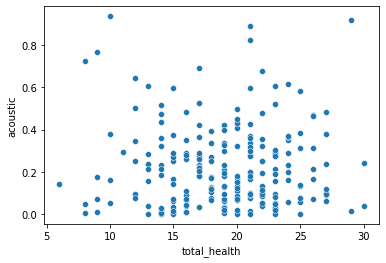

In [ ]:
sns.scatterplot(x='total_health', data=data, y='acoustic') 

## Popularity

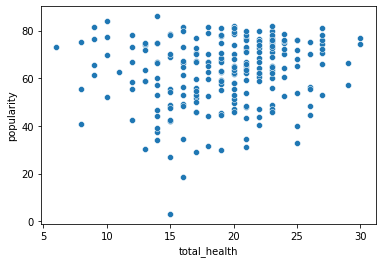

In [ ]:
sns.scatterplot(x='total_health', data=data, y='popularity') 

# Data Visualisation: Total health mapped to each song variable (energy to popularity) and grouped by trauma.

## Energy

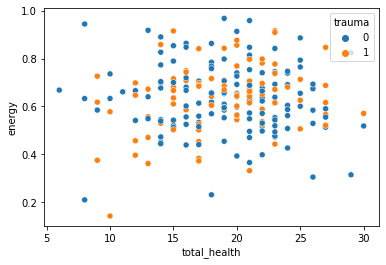

In [ ]:
sns.scatterplot(x='total_health', data=data, y='energy', hue='trauma') 

## Dance

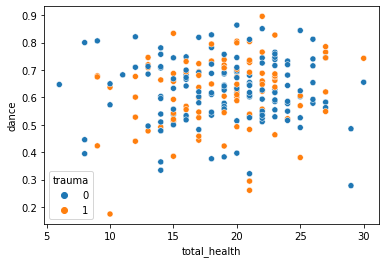

In [ ]:
sns.scatterplot(x='total_health', data=data, y='dance', hue='trauma') 

## Liveness

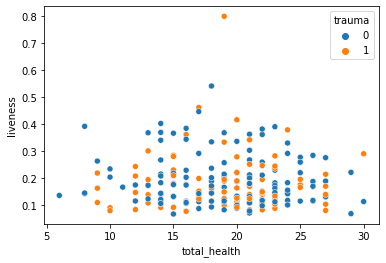

In [ ]:
sns.scatterplot(x='total_health', data=data, y='liveness', hue='trauma') 

## Valence

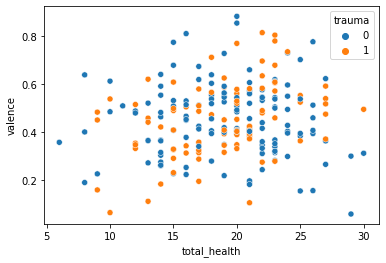

In [ ]:
sns.scatterplot(x='total_health', data=data, y='valence', hue='trauma') 

## Tempo

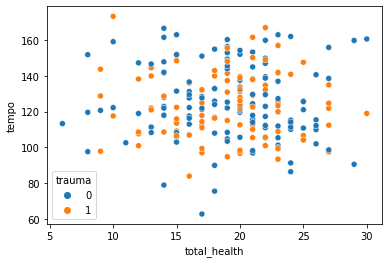

In [ ]:
sns.scatterplot(x='total_health', data=data, y='tempo', hue='trauma') 

## Instrumental

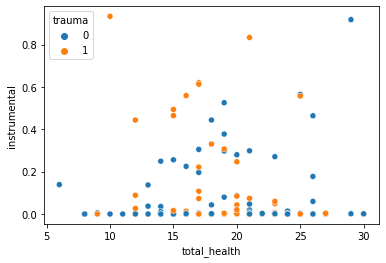

In [ ]:
sns.scatterplot(x='total_health', data=data, y='instrumental', hue='trauma') 

## Acoustic

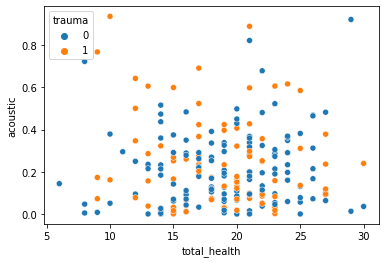

In [ ]:
sns.scatterplot(x='total_health', data=data, y='acoustic', hue='trauma') 

## Popularity

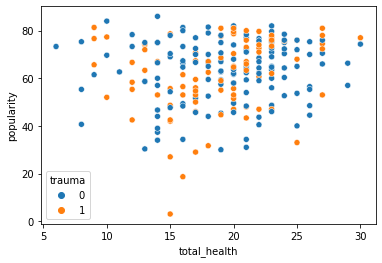

In [ ]:
sns.scatterplot(x='total_health', data=data, y='popularity', hue='trauma') 

# Classification Model: map song variables to amount of music
  * amount_music is categorical so change to int


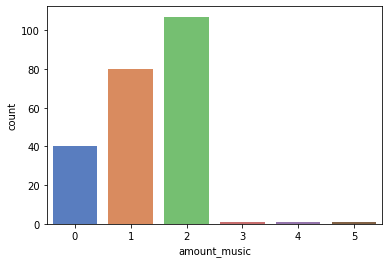

In [ ]:
sns.countplot(x='amount_music', data=data, palette='muted')

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['amount_music', # y
             'timestamp', 
             'gender', 
             'age', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'song1',
             'song2',
             'song3',
             'trauma',
             'id',
             'health_categorical',
             'total_health'],
            axis = 1),
            data['amount_music'],
            test_size=0.3,
            random_state=0) 

In [ ]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

## Decision Tree

[1 1 2 1 0 2 1 1 1 2 1 1 0 2 0 1 0 1 0 0 0 2 1 1 0 2 2 1 1 2 0 1 1 1 2 0 1
 2 2 0 0 2 2 0 2 1 2 1 2 1 1 2 1 2 0 2 0 2 2 2 1 1 2 2 1 2 2 0 1]
              precision    recall  f1-score   support

           0       0.19      0.38      0.25         8
           1       0.33      0.32      0.33        28
           2       0.35      0.28      0.31        32
           3       0.00      0.00      0.00         1

    accuracy                           0.30        69
   macro avg       0.22      0.24      0.22        69
weighted avg       0.32      0.30      0.31        69

Confusion Matrix: 
 [[ 3  3  2  0]
 [ 4  9 15  0]
 [ 9 14  9  0]
 [ 0  1  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(193.15384615384616, 190.26, 'X[2] <= 0.289\ngini = 0.639\nsamples = 161\nvalue = [32, 52, 75, 1, 1]'),
 Text(103.01538461538462, 135.9, 'X[7] <= 78.417\ngini = 0.627\nsamples = 145\nvalue = [24, 50, 69, 1, 1]'),
 Text(51.50769230769231, 81.53999999999999, 'X[1] <= 0.644\ngini = 0.606\nsamples = 131\nvalue = [17, 46, 66, 1, 1]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.635\nsamples = 73\nvalue = [12, 31, 29, 1, 0]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.518\nsamples = 58\nvalue = [5, 15, 37, 0, 1]'),
 Text(154.52307692307693, 81.53999999999999, 'X[0] <= 0.586\ngini = 0.622\nsamples = 14\nvalue = [7, 4, 3, 0, 0]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [1, 0, 3, 0, 0]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.48\nsamples = 10\nvalue = [6, 4, 0, 0, 0]'),
 Text(283.2923076923077, 135.9, 'X[4] <= 148.023\ngini = 0.594\nsamples = 16\nvalue = [8, 2, 6, 0, 0]'),
 Text(257.53846153846155, 81.539

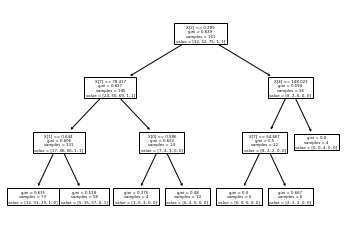

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_1c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_1c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_1c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_1c)

## Emsemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_2c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_2c.fit(X_train_norm, y_train) # Training the model

y_pred = model_2c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.33      0.21      0.26        28
           2       0.43      0.62      0.51        32
           3       0.00      0.00      0.00         1

    accuracy                           0.39        69
   macro avg       0.24      0.24      0.23        69
weighted avg       0.36      0.39      0.36        69

Confusion Matrix: 
 [[ 1  2  5  0]
 [ 2  6 20  0]
 [ 2 10 20  0]
 [ 0  0  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification Model: map song variables to total health 
  * total health is not entirely balanced so during evaluation, let's make sure to check F1 values and AUC instead of just accuracy.

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['amount_music', # y
             'timestamp', 
             'gender', 
             'age', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'song1',
             'song2',
             'song3',
             'trauma',
             'id',
             'health_categorical',
             'total_health'],
            axis = 1),
            data['total_health'],
            test_size=0.3,
            random_state=0) 

In [ ]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

## Decision Tree

[19 19 19 19 23 19 21 23 19 23 19 23 23 19 23 19 19 23 23 23 23 23 19 19
 23 19 19 23 19 19 23 19 19 23 19 23 21 23 23 19 23 23 23 23 23 23 23 19
 23 23 21 19 23 23 23 23 23 19 23 23 19 23 23 23 19 23 23 19 23]
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         4
          19       0.12      0.60      0.19         5
          20       0.00      0.00      0.00         4
          21       0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(125.55000000000001, 190.26, 'X[1] <= 0.344\ngini = 0.931\nsamples = 161\nvalue = [1, 2, 1, 3, 4, 6, 10, 9, 8, 11, 8, 14, 17\n15, 14, 17, 6, 6, 3, 5, 1]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3\n0, 0, 0, 0, 0, 0, 0]'),
 Text(167.4, 135.9, 'X[5] <= 0.001\ngini = 0.931\nsamples = 158\nvalue = [1, 2, 1, 3, 4, 6, 10, 9, 8, 11, 8, 14, 17\n12, 14, 17, 6, 6, 3, 5, 1]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 0.848\ngini = 0.929\nsamples = 90\nvalue = [0, 2, 1, 3, 2, 5, 9, 6, 4, 4, 3, 3, 6, 8\n11, 10, 4, 4, 2, 3, 0]'),
 Text(41.85, 27.180000000000007, 'gini = 0.931\nsamples = 88\nvalue = [0, 2, 1, 3, 2, 5, 9, 6, 4, 4, 3, 3, 6, 8\n9, 10, 4, 4, 2, 3, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n2, 0, 0, 0, 0, 0, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[7] <= 78.333\ngini = 0.906\nsamples = 68\nvalue = [1, 0, 0, 0, 2, 1, 1, 3, 4, 7, 5, 11,

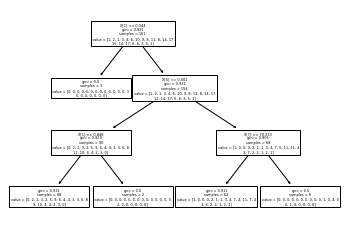

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_3c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_3c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_3c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_3c)

## Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_4c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_4c.fit(X_train_norm, y_train) # Training the model

y_pred = model_4c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.20      0.25      0.22         4
          15       0.50      0.20      0.29         5
          16       0.00      0.00      0.00         5
          17       0.12      0.25      0.17         4
          18       0.00      0.00      0.00         4
          19       0.11      0.20      0.14         5
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         3
          25       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification Model: map amount of music to total health
  * amount_music is categorical so change to int

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['energy',
                                                               'dance',
                                                               'liveness',
                                                               'valence',
                                                               'tempo',
                                                               'instrumental',
                                                               'acoustic',
                                                               'popularity',
                                                               'timestamp', 
                                                               'gender', 
                                                               'age', 
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'trauma',
                                                               'id',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['total_health'],
                                                    test_size=0.3,
                                                    random_state=0) 

In [ ]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

## Decision Tree

[21 21 21 19 17 21 19 19 19 19 19 19 19 21 19 21 21 17 19 21 21 21 21 21
 17 19 19 21 17 19 19 21 21 21 19 17 19 19 19 21 21 17 21 21 19 21 19 21
 21 21 21 19 19 21 21 21 21 19 21 19 21 21 17 19 17 19 19 21 19]
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.12      0.25      0.17         4
          18       0.00      0.00      0.00         4
          19       0.14      0.80      0.24         5
          20       0.00      0.00      0.00         4
          21       0.06      0.3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(125.55000000000001, 190.26, 'X[0] <= 0.5\ngini = 0.931\nsamples = 161\nvalue = [1, 2, 1, 3, 4, 6, 10, 9, 8, 11, 8, 14, 17\n15, 14, 17, 6, 6, 3, 5, 1]'),
 Text(83.7, 135.9, 'gini = 0.902\nsamples = 32\nvalue = [0, 0, 0, 2, 0, 3, 2, 1, 2, 5, 0, 2, 4, 1\n1, 5, 2, 1, 0, 1, 0]'),
 Text(167.4, 135.9, 'X[0] <= 3.0\ngini = 0.929\nsamples = 129\nvalue = [1, 2, 1, 1, 4, 3, 8, 8, 6, 6, 8, 12, 13, 14\n13, 12, 4, 5, 3, 4, 1]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 1.5\ngini = 0.927\nsamples = 127\nvalue = [0, 2, 1, 1, 4, 3, 8, 8, 6, 6, 8, 12, 13, 14\n13, 12, 4, 4, 3, 4, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.923\nsamples = 52\nvalue = [0, 0, 0, 1, 1, 1, 3, 5, 5, 3, 2, 6, 4, 4\n6, 4, 2, 2, 2, 1, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.921\nsamples = 75\nvalue = [0, 2, 1, 0, 3, 2, 5, 3, 1, 3, 6, 6, 9, 10\n7, 8, 2, 2, 1, 3, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

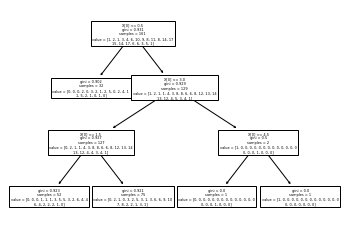

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_5c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_5c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_5c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_5c)

## Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_6c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_6c.fit(X_train_norm, y_train) # Training the model

y_pred = model_6c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         4
          19       0.11      0.80      0.20         5
          20       0.00      0.00      0.00         4
          21       0.06      0.33      0.11         6
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         3
          25       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification Model: map song variables to trauma

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['amount_music',
                                                               'timestamp', 
                                                               'gender', 
                                                               'age', 
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'trauma',
                                                               'id',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['trauma'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

## Decision Tree

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        45
           1       0.29      0.08      0.13        24

    accuracy                           0.61        69
   macro avg       0.47      0.49      0.44        69
weighted avg       0.52      0.61      0.53        69

Confusion Matrix: 
 [[40  5]
 [22  2]]


[Text(197.83636363636364, 190.26, 'X[6] <= 0.523\ngini = 0.484\nsamples = 161\nvalue = [95, 66]'),
 Text(121.74545454545455, 135.9, 'X[0] <= 0.521\ngini = 0.47\nsamples = 151\nvalue = [94, 57]'),
 Text(60.872727272727275, 81.53999999999999, 'X[5] <= 0.444\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(30.436363636363637, 27.180000000000007, 'gini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(91.30909090909091, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(182.61818181818182, 81.53999999999999, 'X[0] <= 0.538\ngini = 0.491\nsamples = 125\nvalue = [71, 54]'),
 Text(152.1818181818182, 27.180000000000007, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(213.05454545454546, 27.180000000000007, 'gini = 0.484\nsamples = 119\nvalue = [70, 49]'),
 Text(273.92727272727274, 135.9, 'X[0] <= 0.271\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(243.4909090909091, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(304.3636363636364, 81.539999

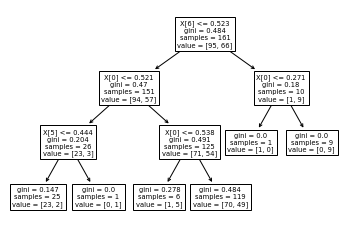

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_7c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_7c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_7c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_7c)

## Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_8c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.21) # Define the model with parameters
model_8c.fit(X_train_norm, y_train) # Training the model

y_pred = model_8c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        45
           1       0.42      0.54      0.47        24

    accuracy                           0.58        69
   macro avg       0.56      0.57      0.56        69
weighted avg       0.61      0.58      0.59        69

Confusion Matrix: 
 [[27 18]
 [11 13]]


# Classification Model: Predict trauma with non-health variables (excludes health indicators, total_health, health_categorical, trauma)


In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'trauma',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['trauma'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

## Decision Tree

[1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.68      0.51      0.58        45
           1       0.37      0.54      0.44        24

    accuracy                           0.52        69
   macro avg       0.52      0.53      0.51        69
weighted avg       0.57      0.52      0.53        69

Confusion Matrix: 
 [[23 22]
 [11 13]]


[Text(197.83636363636364, 190.26, 'X[9] <= 0.523\ngini = 0.484\nsamples = 161\nvalue = [95, 66]'),
 Text(121.74545454545455, 135.9, 'X[3] <= 0.521\ngini = 0.47\nsamples = 151\nvalue = [94, 57]'),
 Text(60.872727272727275, 81.53999999999999, 'X[8] <= 0.444\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(30.436363636363637, 27.180000000000007, 'gini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(91.30909090909091, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(182.61818181818182, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.491\nsamples = 125\nvalue = [71, 54]'),
 Text(152.1818181818182, 27.180000000000007, 'gini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(213.05454545454546, 27.180000000000007, 'gini = 0.444\nsamples = 60\nvalue = [40, 20]'),
 Text(273.92727272727274, 135.9, 'X[3] <= 0.271\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(243.4909090909091, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(304.3636363636364, 81.539999

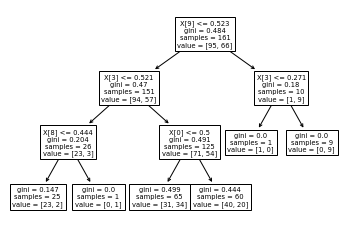

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_9c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_9c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_9c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_9c)

## Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_10c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.40) # Define the model with parameters
model_10c.fit(X_train_norm, y_train) # Training the model

y_pred = model_10c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        45
           1       0.39      0.46      0.42        24

    accuracy                           0.57        69
   macro avg       0.54      0.54      0.54        69
weighted avg       0.58      0.57      0.57        69

Confusion Matrix: 
 [[28 17]
 [13 11]]


# Classification Model: Predict total health with non-health variables


In [ ]:
data.columns

Index(['timestamp', 'gender', 'age', 'amount_music', 'life_enjoyment',
       'resilience', 'balanced_life', 'emotional_flex', 'self_actualization',
       'song1', 'song2', 'song3', 'trauma', 'id', 'total_health', 'energy',
       'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic',
       'popularity', 'health_categorical'],
      dtype='object')

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', # health variables
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex',
                                                               'self_actualization',
                                                               'health_categorical', # health categorical
                                                               'total_health'], # total health
                                                              axis = 1),
                                                    data['total_health'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

## Decision Tree

[19 19 19 19 23 19 21 23 19 23 19 23 23 19 23 19 19 23 23 23 23 23 19 19
 23 19 19 23 19 19 23 19 19 23 19 23 21 23 23 19 23 23 23 23 23 23 23 19
 23 23 21 19 23 23 23 23 23 19 23 23 19 23 23 23 19 23 23 19 23]
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         4
          19       0.12      0.60      0.19         5
          20       0.00      0.00      0.00         4
          21       0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(125.55000000000001, 190.26, 'X[5] <= 0.344\ngini = 0.931\nsamples = 161\nvalue = [1, 2, 1, 3, 4, 6, 10, 9, 8, 11, 8, 14, 17\n15, 14, 17, 6, 6, 3, 5, 1]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3\n0, 0, 0, 0, 0, 0, 0]'),
 Text(167.4, 135.9, 'X[9] <= 0.001\ngini = 0.931\nsamples = 158\nvalue = [1, 2, 1, 3, 4, 6, 10, 9, 8, 11, 8, 14, 17\n12, 14, 17, 6, 6, 3, 5, 1]'),
 Text(83.7, 81.53999999999999, 'X[5] <= 0.848\ngini = 0.929\nsamples = 90\nvalue = [0, 2, 1, 3, 2, 5, 9, 6, 4, 4, 3, 3, 6, 8\n11, 10, 4, 4, 2, 3, 0]'),
 Text(41.85, 27.180000000000007, 'gini = 0.931\nsamples = 88\nvalue = [0, 2, 1, 3, 2, 5, 9, 6, 4, 4, 3, 3, 6, 8\n9, 10, 4, 4, 2, 3, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n2, 0, 0, 0, 0, 0, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[11] <= 78.333\ngini = 0.906\nsamples = 68\nvalue = [1, 0, 0, 0, 2, 1, 1, 3, 4, 7, 5, 11

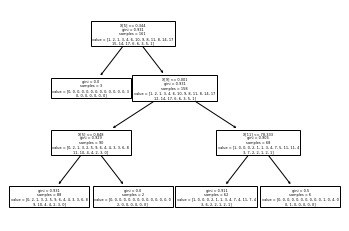

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_11c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_11c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_11c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_11c)

## Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_12c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.31) # Define the model with parameters
model_12c.fit(X_train_norm, y_train) # Training the model

y_pred = model_12c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.25      0.50      0.33         2
          14       0.00      0.00      0.00         4
          15       0.50      0.20      0.29         5
          16       0.00      0.00      0.00         5
          17       0.17      0.25      0.20         4
          18       0.00      0.00      0.00         4
          19       0.14      0.20      0.17         5
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         6
          22       0.10      0.25      0.14         4
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         3
          25       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification Model: Predict specific health variable with non-health variables

## Variable 1: Life Enjoyment

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', # health vars
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['life_enjoyment'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Decision Tree

[3 4 4 4 3 4 3 3 4 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 6 3 3 3 3 4 3 3 4 3 3 2 3
 3 4 2 2 3 3 3 3 4 0 3 5 4 3 4 3 0 3 5 2 3 5 5 4 3 3 3 4 3 3 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.17      0.08      0.11        12
           3       0.35      0.79      0.48        19
           4       0.23      0.23      0.23        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         4

    accuracy                           0.28        69
   macro avg       0.11      0.16      0.12        69
weighted avg       0.17      0.28      0.20        69

Confusion Matrix: 
 [[ 0  0  0  3  0  0  0]
 [ 0  0  1  4  0  0  0]
 [ 0  0  1  7  3  1  0]
 [ 1  0  0 15  2  1  0]
 [ 0  0  2  5  3  2  1]
 [ 1  0  1  7  4  0  0]
 [ 0  0  1  2  1  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[5] <= 0.753\ngini = 0.79\nsamples = 161\nvalue = [3, 9, 21, 45, 45, 27, 11]'),
 Text(83.7, 135.9, 'X[6] <= 0.285\ngini = 0.779\nsamples = 145\nvalue = [2, 9, 21, 39, 45, 23, 6]'),
 Text(41.85, 81.53999999999999, 'X[6] <= 0.179\ngini = 0.776\nsamples = 130\nvalue = [2, 9, 15, 32, 44, 22, 6]'),
 Text(20.925, 27.180000000000007, 'gini = 0.794\nsamples = 85\nvalue = [2, 6, 11, 26, 20, 15, 5]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.661\nsamples = 45\nvalue = [0, 3, 4, 6, 24, 7, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 0.674\ngini = 0.613\nsamples = 15\nvalue = [0, 0, 6, 7, 1, 1, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.531\nsamples = 8\nvalue = [0, 0, 5, 2, 1, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.449\nsamples = 7\nvalue = [0, 0, 1, 5, 0, 1, 0]'),
 Text(251.10000000000002, 135.9, 'X[8] <= 119.84\ngini = 0.695\nsamples = 16\nvalue = [1, 0, 0, 6, 0, 4, 5]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.802\

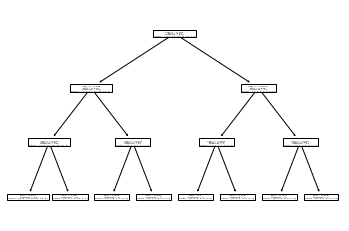

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_13c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_13c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_13c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_13c)

### Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_14c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.20) # Define the model with parameters
model_14c.fit(X_train_norm, y_train) # Training the model

y_pred = model_14c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.20      0.20         5
           2       0.40      0.33      0.36        12
           3       0.29      0.32      0.30        19
           4       0.25      0.31      0.28        13
           5       0.15      0.15      0.15        13
           6       0.25      0.25      0.25         4

    accuracy                           0.26        69
   macro avg       0.22      0.22      0.22        69
weighted avg       0.25      0.26      0.26        69

Confusion Matrix: 
 [[0 0 0 1 1 0 1]
 [0 1 0 1 2 1 0]
 [0 2 4 3 1 2 0]
 [0 2 2 6 4 5 0]
 [0 0 2 4 4 2 1]
 [0 0 2 4 4 2 1]
 [0 0 0 2 0 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Variable 2: Resilience

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['resilience'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Decision Tree

[5 4 4 4 5 6 4 4 4 4 5 4 4 4 4 4 4 5 3 4 4 3 4 4 4 5 4 3 4 4 4 4 4 5 4 6 4
 4 4 4 6 5 3 4 3 4 3 3 4 4 4 4 3 3 4 4 4 5 6 3 4 4 6 3 4 4 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       0.09      0.14      0.11         7
           4       0.23      0.59      0.33        17
           5       0.44      0.22      0.30        18
           6       0.20      0.09      0.13        11

    accuracy                           0.23        69
   macro avg       0.14      0.15      0.12        69
weighted avg       0.21      0.23      0.19        69

Confusion Matrix: 
 [[ 0  0  0  0  2  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  1  9  1  1]
 [ 0  0  0  1  4  1  1]
 [ 0  0  0  6 10  1  0]
 [ 0  0  0  1 11  4  2]
 [ 0  0  0  2  7  1  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[6] <= 0.147\ngini = 0.77\nsamples = 161\nvalue = [3, 14, 33, 49, 44, 18]'),
 Text(83.7, 135.9, 'X[9] <= 0.001\ngini = 0.764\nsamples = 75\nvalue = [2, 8, 20, 14, 25, 6]'),
 Text(41.85, 81.53999999999999, 'X[8] <= 148.175\ngini = 0.79\nsamples = 51\nvalue = [1, 8, 15, 10, 11, 6]'),
 Text(20.925, 27.180000000000007, 'gini = 0.769\nsamples = 42\nvalue = [1, 7, 15, 9, 6, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.617\nsamples = 9\nvalue = [0, 1, 0, 1, 5, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 0.537\ngini = 0.587\nsamples = 24\nvalue = [1, 0, 5, 4, 14, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 0, 0, 4, 2, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.475\nsamples = 18\nvalue = [1, 0, 5, 0, 12, 0]'),
 Text(251.10000000000002, 135.9, 'X[10] <= 0.275\ngini = 0.738\nsamples = 86\nvalue = [1, 6, 13, 35, 19, 12]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.686\nsamples = 63\nv

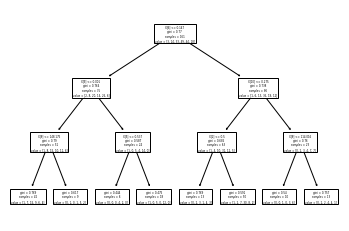

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_15c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_15c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_15c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_15c)

### Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_16c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.20) # Define the model with parameters
model_16c.fit(X_train_norm, y_train) # Training the model

y_pred = model_16c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.11      0.08      0.10        12
           3       0.18      0.43      0.25         7
           4       0.39      0.41      0.40        17
           5       0.36      0.28      0.31        18
           6       0.18      0.18      0.18        11

    accuracy                           0.26        69
   macro avg       0.17      0.20      0.18        69
weighted avg       0.26      0.26      0.25        69

Confusion Matrix: 
 [[0 0 1 0 0 0 1]
 [0 0 0 0 0 2 0]
 [0 0 1 2 3 3 3]
 [0 0 0 3 2 2 0]
 [0 0 4 5 7 0 1]
 [0 0 2 6 1 5 4]
 [0 0 1 1 5 2 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Variable 3: Balanced Life

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['balanced_life'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Decision Tree

[4 4 4 3 4 4 1 4 4 4 2 3 4 4 4 4 3 4 4 4 4 4 4 2 2 4 3 3 3 4 4 4 3 4 3 4 1
 4 4 4 4 4 3 4 4 4 4 3 4 4 3 3 3 4 4 5 4 4 5 4 3 1 4 4 3 4 4 3 4]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        12
           3       0.31      0.31      0.31        16
           4       0.27      0.86      0.41        14
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        12

    accuracy                           0.25        69
   macro avg       0.10      0.19      0.12        69
weighted avg       0.13      0.25      0.15        69

Confusion Matrix: 
 [[ 0  0  0  0  0  0]
 [ 0  0  3  8  1  0]
 [ 2  0  5  9  0  0]
 [ 0  0  2 12  0  0]
 [ 0  1  3 11  0  0]
 [ 1  2  3  5  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(186.0, 190.26, 'X[4] <= 0.513\ngini = 0.8\nsamples = 161\nvalue = [2, 11, 33, 30, 43, 34, 8]'),
 Text(111.60000000000001, 135.9, 'X[4] <= 0.475\ngini = 0.711\nsamples = 29\nvalue = [1, 3, 9, 2, 12, 2, 0]'),
 Text(74.4, 81.53999999999999, 'X[5] <= 0.527\ngini = 0.744\nsamples = 22\nvalue = [1, 3, 9, 2, 5, 2, 0]'),
 Text(37.2, 27.180000000000007, 'gini = 0.765\nsamples = 9\nvalue = [1, 3, 2, 2, 0, 1, 0]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.556\nsamples = 13\nvalue = [0, 0, 7, 0, 5, 1, 0]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 7, 0, 0]'),
 Text(260.40000000000003, 135.9, 'X[5] <= 0.823\ngini = 0.801\nsamples = 132\nvalue = [1, 8, 24, 28, 31, 32, 8]'),
 Text(223.20000000000002, 81.53999999999999, 'X[7] <= 0.342\ngini = 0.803\nsamples = 128\nvalue = [1, 8, 24, 28, 31, 28, 8]'),
 Text(186.0, 27.180000000000007, 'gini = 0.75\nsamples = 20\nvalue = [0, 4, 3, 8, 1, 3, 1]'),
 Text(260.40000000000003, 27.180000000000007, 'gini

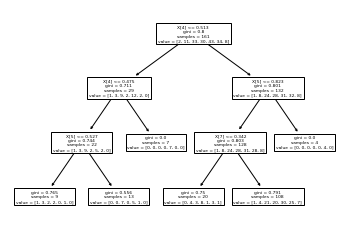

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_17c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_17c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_17c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_17c)

### Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_18c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.20) # Define the model with parameters
model_18c.fit(X_train_norm, y_train) # Training the model

y_pred = model_18c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.14      0.17      0.15        12
           3       0.33      0.31      0.32        16
           4       0.28      0.50      0.36        14
           5       0.25      0.20      0.22        15
           6       0.00      0.00      0.00        12

    accuracy                           0.25        69
   macro avg       0.17      0.20      0.18        69
weighted avg       0.21      0.25      0.22        69

Confusion Matrix: 
 [[0 0 0 0 0 0]
 [0 2 2 5 3 0]
 [2 3 5 4 2 0]
 [0 2 3 7 2 0]
 [0 4 3 5 3 0]
 [1 3 2 4 2 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Variable 4: Emotional Flexibility

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['emotional_flex'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Decision Tree

[4 5 4 5 4 4 5 5 4 5 4 4 4 3 5 5 4 4 5 4 5 4 4 4 5 4 4 5 4 4 5 4 5 4 4 5 5
 5 5 4 4 5 5 4 5 5 5 5 5 5 4 4 5 5 4 4 5 4 5 5 4 5 5 5 3 5 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        12
           3       0.50      0.08      0.14        12
           4       0.16      0.33      0.21        15
           5       0.20      0.64      0.30        11
           6       0.00      0.00      0.00        10

    accuracy                           0.19        69
   macro avg       0.12      0.15      0.09        69
weighted avg       0.15      0.19      0.12        69

Confusion Matrix: 
 [[ 0  0  0  0  2  2  0]
 [ 0  0  0  1  2  2  0]
 [ 0  0  0  0  9  3  0]
 [ 0  0  0  1  7  4  0]
 [ 0  0  0  0  5 10  0]
 [ 0  0  0  0  4  7  0]
 [ 0  0  0  0  3  7  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[11] <= 60.167\ngini = 0.793\nsamples = 161\nvalue = [5, 7, 22, 28, 41, 47, 11]'),
 Text(83.7, 135.9, 'X[4] <= 0.536\ngini = 0.739\nsamples = 55\nvalue = [1, 1, 7, 10, 23, 10, 3]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.526\ngini = 0.773\nsamples = 15\nvalue = [1, 1, 4, 0, 4, 4, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 6\nvalue = [0, 1, 1, 0, 0, 4, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.667\nsamples = 9\nvalue = [1, 0, 3, 0, 4, 0, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 0.551\ngini = 0.681\nsamples = 40\nvalue = [0, 0, 3, 10, 19, 6, 2]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.672\nsamples = 38\nvalue = [0, 0, 3, 8, 19, 6, 2]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.63\ngini = 0.79\nsamples = 106\nvalue = [4, 6, 15, 18, 18, 37, 8]'),
 Text(209.25, 81.53999999999999, 'X[11] <= 78.75\ngini = 

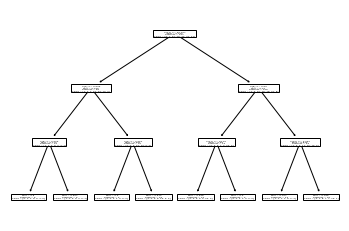

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_19c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_19c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_19c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_19c)

### Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_20c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.20) # Define the model with parameters
model_20c.fit(X_train_norm, y_train) # Training the model

y_pred = model_20c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.08      0.08      0.08        12
           3       0.36      0.42      0.38        12
           4       0.21      0.20      0.21        15
           5       0.32      0.64      0.42        11
           6       0.33      0.20      0.25        10

    accuracy                           0.26        69
   macro avg       0.19      0.22      0.19        69
weighted avg       0.22      0.26      0.23        69

Confusion Matrix: 
 [[0 0 1 1 1 0 1]
 [0 0 1 1 2 1 0]
 [0 0 1 4 5 0 2]
 [0 0 0 5 2 4 1]
 [1 0 4 1 3 6 0]
 [0 0 2 2 0 7 0]
 [0 0 3 0 1 4 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Variable 5: Self-actualization

In [ ]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['timestamp',
                                                               'id',
                                                               'song1',
                                                               'song2',
                                                               'song3',
                                                               'life_enjoyment', 
                                                               'resilience', 
                                                               'balanced_life',
                                                               'emotional_flex', 
                                                               'self_actualization',
                                                               'health_categorical',
                                                               'total_health'],
                                                              axis = 1),
                                                    data['self_actualization'],
                                                    test_size=0.3,
                                                    random_state=0)

# normalize data
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Decision Tree

[5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 3 5 5 4 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 2 5 2
 5 5 5 5 5 5 5 5 5 4 5 5 5 5 2 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10
           4       0.33      0.06      0.10        17
           5       0.27      0.89      0.41        18
           6       0.00      0.00      0.00        16

    accuracy                           0.25        69
   macro avg       0.09      0.14      0.07        69
weighted avg       0.15      0.25      0.13        69

Confusion Matrix: 
 [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  1  0  0  9  0]
 [ 0  0  1  0  1 15  0]
 [ 0  0  1  0  1 16  0]
 [ 0  0  2  1  1 12  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(141.64615384615385, 190.26, 'X[1] <= 0.5\ngini = 0.765\nsamples = 161\nvalue = [4, 12, 20, 42, 54, 29]'),
 Text(51.50769230769231, 135.9, 'X[5] <= 0.641\ngini = 0.531\nsamples = 8\nvalue = [0, 0, 5, 0, 1, 2]'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0, 0, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[10] <= 0.076\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 1, 2]'),
 Text(51.50769230769231, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(103.01538461538462, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2]'),
 Text(231.7846153846154, 135.9, 'X[11] <= 80.333\ngini = 0.757\nsamples = 153\nvalue = [4, 12, 15, 42, 53, 27]'),
 Text(180.27692307692308, 81.53999999999999, 'X[7] <= 0.21\ngini = 0.753\nsamples = 145\nvalue = [4, 10, 15, 37, 53, 26]'),
 Text(154.52307692307693, 27.180000000000007, 'gini = 0.688\nsamples = 8\nvalue = [0, 4, 1, 1, 1, 1]'),
 Text(206.030769230

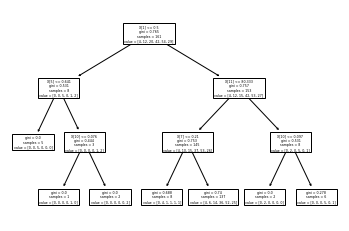

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_21c = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_21c.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_21c.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_21c)

### Ensemble Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_22c = AdaBoostClassifier(n_estimators=1000, learning_rate=0.31) # Define the model with parameters
model_22c.fit(X_train_norm, y_train) # Training the model

y_pred = model_22c.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10
           4       0.29      0.41      0.34        17
           5       0.28      0.39      0.33        18
           6       0.13      0.12      0.13        16

    accuracy                           0.25        69
   macro avg       0.24      0.17      0.17        69
weighted avg       0.23      0.25      0.22        69

Confusion Matrix: 
 [[0 0 0 0 0 0 1]
 [0 1 0 0 1 2 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 2 7 1]
 [0 0 1 0 7 4 5]
 [0 0 0 0 5 7 6]
 [0 0 2 0 7 5 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
